In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
#Defining features and outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

#Replace missing values with a 0.  I have no idea why they used a '?'
X= X.replace(to_replace = '?', value = 0)

#Binarize Y so that 1 means heart disease, 0 means clean
y = np.where(y>0, 0, 1)

#Ask about what the above line means and does. 


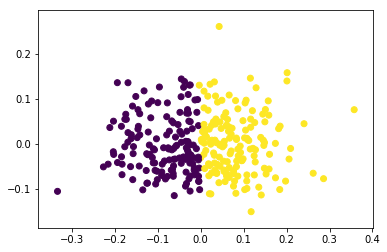

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [13]:
#Normalize the data
X_norm = normalize(X)

#Reduce it to 2 components
X_pca = PCA(2).fit_transform(X_norm)

#Calculate predicted values with 2 clusters.
y_pred = KMeans(n_clusters = 2, random_state = 42).fit_predict(X_pca)

#Plot the solution. 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [14]:
#Really bad model above

minibatchkmeans = MiniBatchKMeans(init = 'random',
                                  n_clusters = 2,
                                 batch_size = 200)

minibatchkmeans.fit(X_pca)

#Add new predicted cluster memberships to tehh data frame
predict_mini = minibatchkmeans.predict(X_pca)

#Check minibatch against the earlier model

print('Comparing k means and mini batch k-means solutions')
print(pd.crosstab(predict_mini, y_pred))

Comparing k means and mini batch k-means solutions
col_0    0    1
row_0          
0        0  152
1      149    2


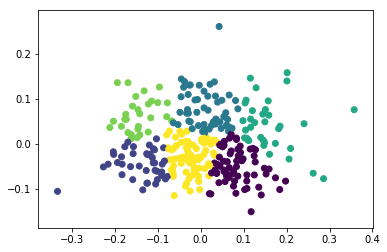

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


In [15]:
y_pred2 = KMeans(n_clusters = 6, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred2)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y))
#Looking at the results I have no idea if that means its better


Here we are going to do an example using make_blobs to create already normalized data to experiment on

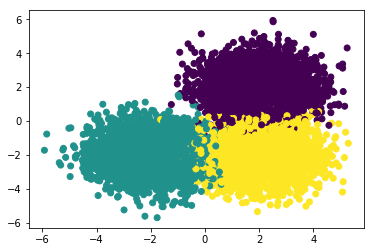

In [16]:

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

#The coordinates of the centers of our blobs.
centers = [[2,2], [-2,-2], [2,-2]]

#make 10,000 rows worth of data with two features representing three 
#clusters each with standard deviation of 1. 

X, y = make_blobs(n_samples = 10000,
                 centers = centers,
                 cluster_std = 1,
                 n_features = 2,
                 random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [17]:
#Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   test_size = .9,
                                                   random_state = 42)


In [18]:
#starting a mean shift model

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile = .2, n_samples = 500)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

labels = ms.labels_

#Coordinates of the cluster centers
cluster_centers = ms.cluster_centers_

#Count the clusters

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


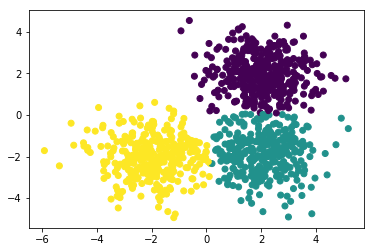

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [19]:
plt.scatter(X_train[:,0], X_train[:,1], c= labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

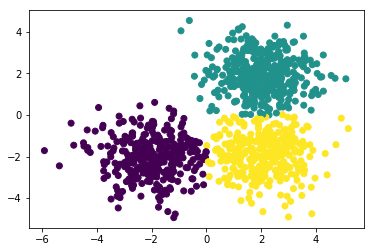

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  357    5
1      310    1    9
2        5    7  306


In [20]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [21]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

#Declare the model and fit it in one statement
af = AffinityPropagation().fit(X_train)
print('Done')

#Pull th enumber of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


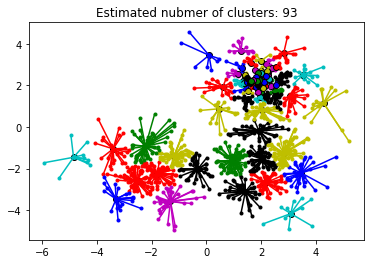

In [22]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor = col,
            markeredgecolor = 'k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated nubmer of clusters: {}'.format(n_clusters_))
plt.show()

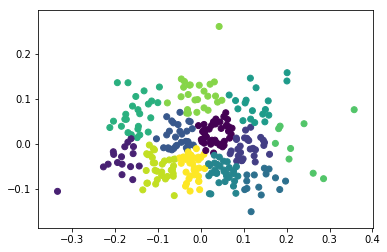

Comparing k-means clusters against the data:


ValueError: arrays must all be same length

In [24]:
y_pred2 = KMeans(n_clusters = 12, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred2)
plt.show()


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y))
#With some of the outliers I dont think this is a good one

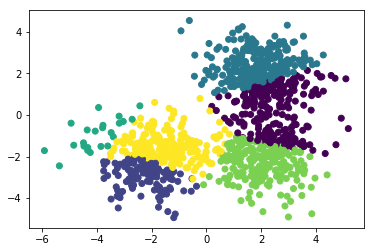

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4    5
row_0                             
0      124    0  238   0    0    0
1        0  118    0  23    5  174
2       90    1    0   0  209   18


In [25]:
# We know we're looking for three clusters.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
#Yeah 3 is better then 6 here. 